In [46]:
import pandas as pd
import numpy as np

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from sklearn.datasets import load_iris

In [49]:
iris = load_iris()

In [50]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
X=iris.data
y=iris.target
#we are going to divide half the data into training set to train our modal and rest into testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.9333333333333333

[Text(0.5, 0.875, 'X[2] <= 4.85\ngini = 0.658\nsamples = 75\nvalue = [20, 25, 30]'),
 Text(0.25, 0.625, 'X[3] <= 0.75\ngini = 0.498\nsamples = 43\nvalue = [20, 23, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(0.75, 0.625, 'X[3] <= 1.75\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(0.625, 0.375, 'X[2] <= 5.3\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

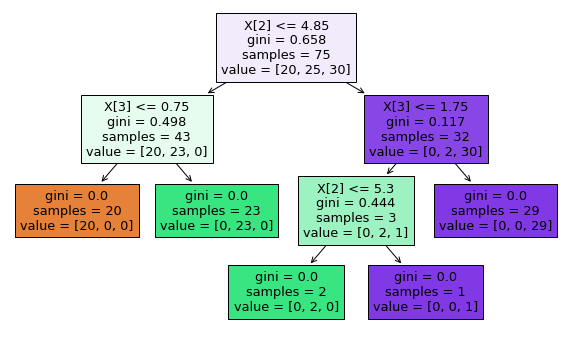

In [55]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(classifier, filled=True)

<img src="./post_prunning1.png" alt="Alternative text" />


In [56]:
import sklearn
sklearn.__version__

'1.0.2'

In [57]:
path = classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [58]:
ccp_alphas

array([0.        , 0.01777778, 0.03222222, 0.28527132, 0.32250646])

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32250645994832045


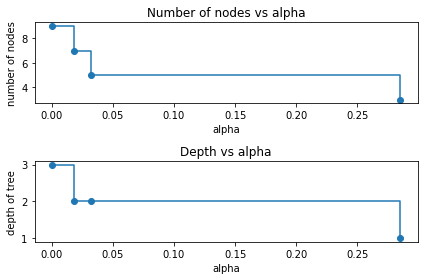

In [60]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

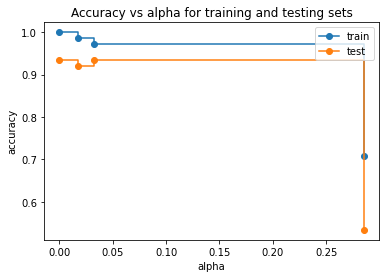

In [61]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
classifier=DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [63]:
pred = classifier.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)

In [65]:
accuracy

0.92

[Text(0.5, 0.8333333333333334, 'X[2] <= 4.85\ngini = 0.658\nsamples = 75\nvalue = [20, 25, 30]'),
 Text(0.25, 0.5, 'X[2] <= 2.35\ngini = 0.498\nsamples = 43\nvalue = [20, 23, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(0.75, 0.5, 'X[3] <= 1.75\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

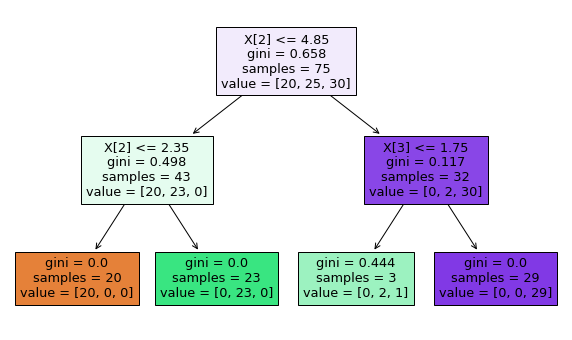

In [66]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(classifier, filled=True)